In [116]:
import numpy as np 
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt



In [117]:
numbers=[]
labels=[]
path = os.getcwd()+"/myData"
for number in os.listdir(path):
  
    numberPath=os.path.join(path,number)
    for image in os.listdir(numberPath):
        imagePath=os.path.join(numberPath,image)
        image = cv2.imread(imagePath)
        image = cv2.resize(
            image,(32,32)
        )
        labels.append(number)
        numbers.append(image)
    print(number,end=" ")

0 1 2 3 4 5 6 7 8 9 

In [118]:
numbers

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

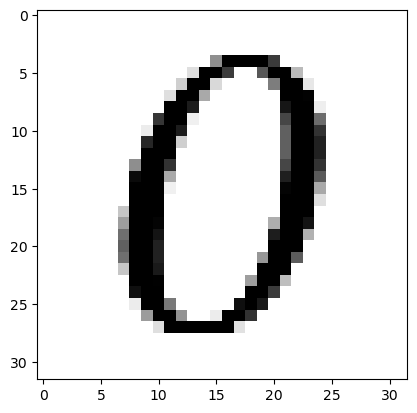

In [119]:
plt.imshow(numbers[550])

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numbers,labels,test_size=0.2,shuffle=True,random_state=42)

In [121]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)

(8128, 32, 32, 3)
(2032, 32, 32, 3)


In [122]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size=0.2)

In [123]:
print(np.array(X_train).shape)
print(np.array(X_validate).shape)

(6502, 32, 32, 3)
(1626, 32, 32, 3)


In [124]:
y_train

['4',
 '6',
 '6',
 '2',
 '5',
 '4',
 '0',
 '1',
 '7',
 '8',
 '5',
 '6',
 '1',
 '7',
 '8',
 '4',
 '4',
 '2',
 '9',
 '1',
 '7',
 '3',
 '6',
 '3',
 '6',
 '5',
 '0',
 '6',
 '8',
 '5',
 '1',
 '3',
 '1',
 '8',
 '7',
 '7',
 '8',
 '5',
 '0',
 '3',
 '6',
 '1',
 '2',
 '8',
 '3',
 '7',
 '0',
 '2',
 '4',
 '7',
 '2',
 '2',
 '1',
 '3',
 '9',
 '3',
 '4',
 '5',
 '0',
 '3',
 '3',
 '5',
 '7',
 '0',
 '2',
 '3',
 '7',
 '6',
 '1',
 '1',
 '0',
 '7',
 '1',
 '9',
 '3',
 '3',
 '6',
 '7',
 '2',
 '9',
 '9',
 '5',
 '1',
 '2',
 '8',
 '0',
 '8',
 '8',
 '0',
 '1',
 '4',
 '0',
 '3',
 '1',
 '7',
 '1',
 '3',
 '9',
 '8',
 '0',
 '2',
 '5',
 '9',
 '7',
 '8',
 '5',
 '9',
 '7',
 '7',
 '7',
 '6',
 '0',
 '5',
 '9',
 '5',
 '2',
 '0',
 '0',
 '8',
 '4',
 '6',
 '9',
 '1',
 '2',
 '0',
 '7',
 '5',
 '3',
 '2',
 '8',
 '6',
 '2',
 '6',
 '9',
 '8',
 '3',
 '6',
 '6',
 '5',
 '9',
 '9',
 '2',
 '5',
 '2',
 '2',
 '4',
 '9',
 '8',
 '3',
 '1',
 '1',
 '4',
 '4',
 '0',
 '1',
 '3',
 '1',
 '7',
 '8',
 '5',
 '3',
 '4',
 '3',
 '0',
 '2',
 '8',
 '0'

In [125]:
lengthOfNumbers = [len(np.where(np.array(y_train)==str(number))[0]) for number in range(0,9)]

In [126]:
lengthOfNumbers

[642, 640, 674, 636, 625, 669, 655, 647, 664]

<BarContainer object of 9 artists>

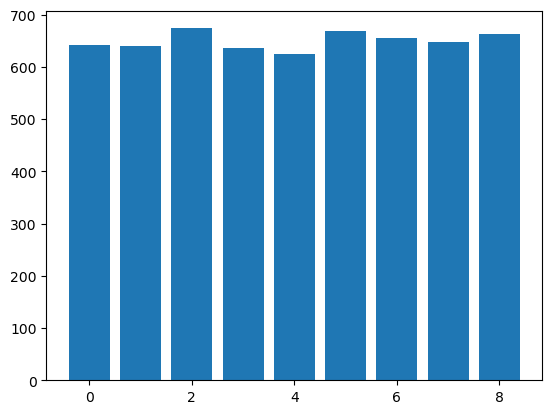

In [127]:
plt.bar(range(0,9),lengthOfNumbers)

In [128]:
def preprocessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing,X_train)))
X_test = np.array(list(map(preprocessing,X_test)))
X_validate = np.array(list(map(preprocessing,X_validate)))
    

In [129]:
X_train.shape

(6502, 32, 32)

In [130]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], X_validate.shape[2],1)

In [131]:
X_train.shape

(6502, 32, 32, 1)

In [132]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

dataGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [133]:
dataGen.fit(X_train)


In [134]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_validate = to_categorical(y_validate,10)

In [135]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam

def Model():
    noOfFilters = 60
    sizeOfFilters1 = (5,5)
    sizeOfFilters2 = (3,3)
    sizeOfPool = (2,2)
    noOfNode = 500

    model = Sequential()
    model.add(Conv2D(noOfFilters,sizeOfFilters1,input_shape=(32,32,1),activation="relu"))
    model.add(Conv2D(noOfFilters,sizeOfFilters1,activation="relu"))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Conv2D(noOfFilters//2,sizeOfFilters2,activation="relu"))
    model.add(Conv2D(noOfFilters//2,sizeOfFilters2,activation="relu"))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(noOfNode,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=["accuracy"])

    return model

In [136]:
model = Model()

c:\Users\hosma\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [137]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

In [138]:
import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5



In [155]:
history = model.fit(dataGen.flow(X_train,y_train,
                                 batch_size=5),
                                 steps_per_epoch=1200 ,
                                 epochs=200,
                                 validation_data=(X_validate,y_validate),
                                 shuffle=1)

Epoch 1/200
1200/1200 [==============================] - 12s 10ms/step - loss: 0.0963 - accuracy: 0.9692 - val_loss: 0.0262 - val_accuracy: 0.9914
Epoch 2/200
1200/1200 [==============================] - 12s 10ms/step - loss: 0.1130 - accuracy: 0.9678 - val_loss: 0.0308 - val_accuracy: 0.9926
Epoch 3/200
1200/1200 [==============================] - 11s 9ms/step - loss: 0.1163 - accuracy: 0.9646 - val_loss: 0.0260 - val_accuracy: 0.9920
Epoch 4/200
1200/1200 [==============================] - 10s 9ms/step - loss: 0.1047 - accuracy: 0.9690 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 5/200
1200/1200 [==============================] - 11s 9ms/step - loss: 0.1232 - accuracy: 0.9653 - val_loss: 0.0277 - val_accuracy: 0.9920
Epoch 6/200
1200/1200 [==============================] - 11s 9ms/step - loss: 0.1149 - accuracy: 0.9675 - val_loss: 0.0284 - val_accuracy: 0.9914
Epoch 7/200
1200/1200 [==============================] - 11s 9ms/step - loss: 0.1126 - accuracy: 0.9690 - val_loss: 0.0322

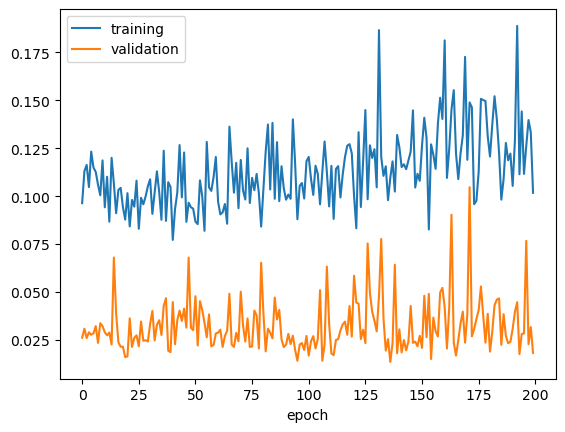

In [157]:

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["training","validation"])
plt.xlabel("epoch")
plt.show()

In [158]:
score = model.evaluate(X_test, y_test,verbose=0)
print(score)

[0.030192164704203606, 0.9906495809555054]


In [162]:
model.save('model/model_trained')

INFO:tensorflow:Assets written to: model/model_trained\assets


In [164]:
import keras
loaded_1 = keras.models.load_model(
    "model/model_trained", custom_objects={"CustomModel": Model}
)

In [166]:
X_test[0]

array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

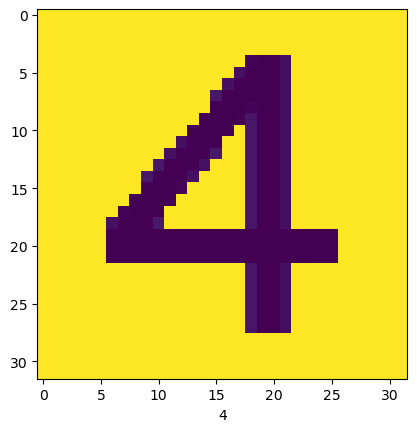

In [175]:
val=model.predict(np.array(X_test))
valLabel = np.argmax(val[20])
plt.imshow(X_test[20])
plt.xlabel(valLabel)
plt.show()

In [159]:
import pickle
pickle_out = open("model/model_trained2.p5","wb")
pickle.dump(model,pickle_out)
pickle_out.close()

INFO:tensorflow:Assets written to: ram://52acbf72-9728-4d61-b14b-687c7d4e4d76/assets


NotFoundError: 